## 3 Different Implementations of Dyson Brownian Motion

Below, we provide 3 different implementation of Dyson Brownian Motion. Note that Alan Edelman in his class uses the first one, i.e. **does not** normalize in order to have variance 1. Furthermore, Alan Edelman does not use a GUE (complex Gaussians).

In [653]:
function Dyson_2(m, n, τ)
    # s is the number of steps
    # n is the size of the symmetric square GUE
    # τ is a vector of time moments
    #τ = [n^(1/3)*(i-1) for i in [1 120 320 400 500 1000 3000]]
    #m = 7
    D = zeros(ComplexF64, m, n, n)
    A = zeros(m)
    M = zeros(m)

    for i in 2:m
        G_i = randn(n, n) + im*randn(n,n)
        dG_i = (G_i + G_i') / √(2) # Here we normalize by √2
        
        dτ = τ[i] - τ[i-1]
        D[i, :, :] = √dτ * (D[i-1, :, :] + dG_i)/ √τ[i] # cumsum
        
        # definition of Airy Process
        A[i] = 10*√2 * n^(1/6) * (eigmax(D[i, :, :]) - √(2*n))/(sqrt(2*n*τ[i]))
        M[i] = eigmax(D[i, :, :])
        #print("Airy value: ")
        #print(τ[i])
        #println(A[i])
        #print("Max eigenvalue: ")
        #println(eigmax(D[i, :, :]))
    end
    return D, A, M
end
#println(sum(A)/10)
#plot([1, 120, 320, 400, 500, 1000, 3000],A)

Dyson_2 (generic function with 1 method)

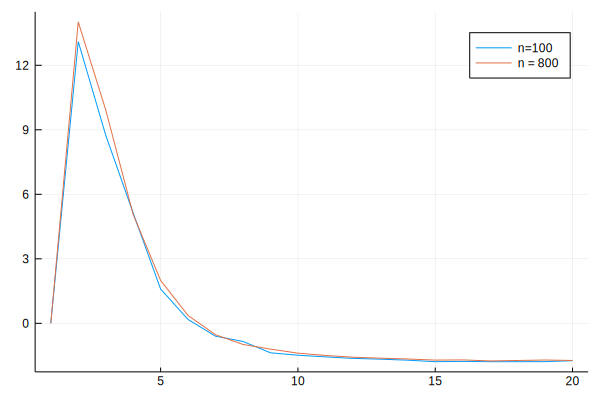

In [654]:
XA = 1:20#, 3000]
n = 100
m = length(XA)
τ = [n^(1/3)*(i-1) for i in XA]

D, A, M = Dyson_2(m, n, τ);

plot(XA, A, label = "n=100")
#plot!(XA, M)

n = 800
m = length(XA)
τ = [n^(1/3)*(i-1) for i in XA]

D, A, M = Dyson_2(m, n, τ);

plot!(XA, A,label = "n = 800")

#plot!(τ, M)

In [637]:
G_i = randn(n, n) + im*randn(n,n)
dG_i = (G_i + G_i') / √(8*n)
eigmax(dG_i)

1.394493544681128

## A Monte Carlo Simulation

Next let us perform the following Monte Carlo simulation. For a number of iterations, E, we generate E copies of a Dyson Brownian Motion and collect statistics to empirically compute the probability $$P(A(\tau_1) < \xi_1, A(\tau_2) < \xi_2, \dots, A(\tau_m) < \xi_m)$$

where $\tau_1 < \tau_2 < \dots < \tau_m$ and $\xi_1, \xi_2, \dots, \xi_m$ are appropriately (?) chosen thresholds.


In [607]:
#Set Monte Carlo Parameters
XS = 1:20
n = 500 # Matrix size
m = length(XS) # Step size
τ = [n^(1/3)*(i-1) for i in XS]# Time Moments
ξ = [b for b in -25:0.5:5]# Thresholds to Look at for CDF

E = 100 # Number of Trials


100

In [593]:
# Collect a bunch of Airy Process Data
A = zeros(E,m)
M = zeros(E,m)

for e in 1:E # E trials
    # Generate a Dyson Brownian Motion    
    D, A[e,:], M[e,:] = Dyson_2(m, n, τ)

end


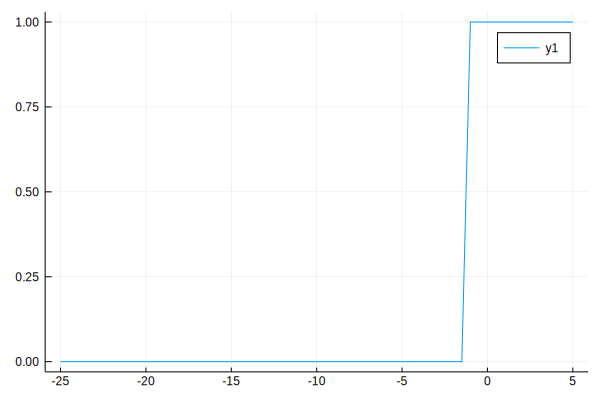

In [633]:
# Compute Empirical CDF and plot
cnt = zeros(length(ξ),1)
for e = 1:E
    for h = 1:length(ξ)
        flag = true
        # The for loop checks whether A(t_1) < s_1 ∩ A(t_2) < s_2 ∩ … A(t_m) < s_m
        for i in [9, 15, 20]
            if (A[e,i] >= ξ[h])
                flag = false
            end
        end
        if flag
            cnt[h] += 1
        end
    end
end
res = cnt ./ E
plot(ξ,res)

## Fredholm Determinants

The matrix determinant:

$$
    d(z) = det\Bigg(I-z
    \begin{pmatrix}
        K_{11} & \dots & K_{1N}  \\
        \vdots & \ddots & \vdots \\
        K_{N1} & \dots & K_{NN}  \\
    \end{pmatrix}_{\upharpoonright L^2(J_1) \oplus \dots \oplus L^2(J_n)}\Bigg)  
$$

can be approximated by:

$$
    d(z) = det\Bigg(I-z
    \begin{pmatrix}
        A_{11} & \dots & A_{1N}  \\
        \vdots & \ddots & \vdots \\
        A_{N1} & \dots & A_{NN}  \\
    \end{pmatrix} \Bigg)  
$$

where:

$$(A_{ij})_{(p,q)} = w_{ip}^{1/2}K_{ij}(x_{ip}, x_{jq})w_{jq}^{1/2}, \; (p,q = 1,2,\dots, m)$$


$$
\begin{equation}
    J_i = (\xi_i, \infty)
\end{equation}
$$
Analyticity of $K_{ij}(x,y)$ in a complex neighborhood of $J_i \times J_j$ guarantees exponential convergence.

The famous relationship between the Dyson Brownian Motion and the Extended Airy Process states that we can compute the probability: $P(A(\tau_1) < \xi_1, A(\tau_2) < \xi_2, \dots, A(\tau_m) < \xi_m)$ as a Fredholm determinant:

$$
\begin{equation}
    P(A(\tau_1) < s_1, A(\tau_2) < s_2, \dots, A(\tau_m) < s_m) =  d(1) = det\Bigg(I-1
    \begin{pmatrix}
        A_{11} & \dots & A_{1m}  \\
        \vdots & \ddots & \vdots \\
        A_{m1} & \dots & A_{mm}  \\
    \end{pmatrix} \Bigg)   
\end{equation}
$$

where the Extended Airy Kernel is defined as follows:

$$
\begin{align*}
    K_{ij}(x, y) = \int_{0}^{\infty} Ai(x+z)Ai(y+z) e^{-z(\tau_i - \tau_j)} dz, i \geq j \\
    K_{ij}(x, y) = -\int_{-\infty}^{0} Ai(x+z)Ai(y+z) e^{-z(\tau_i - \tau_j)} dz, i < j
\end{align*}
$$

Section 8 in the paper https://arxiv.org/pdf/0804.2543.pdf contains further details.

The functions Aij and Lij below return the exact same result, the ij block of the Fredholm matrix.

In [347]:
function Aij(X, W, τ, ξ, i, j)
    K = (x, y, z) -> exp(z)*exp(-z*(τ[i] - τ[j])) * airyai(x+z) * airyai(y+z)
    K_o = (x,y)-> (airyai(x)*airyaiprime(y)+airyai(y)*airyaiprime(x))/(x-y)
    K_2 = (x, y, z) -> exp(-z)*exp(-z*(τ[i] - τ[j])) * airyai(x+z) * airyai(y+z)
    phi = (x,a) -> a + 10*π*tan(π*(x+1)/4)
    dphi = x -> (5/2)*π^2*sec(π*(x+1)/4)^2
    #χ = (s, y) -> (y > s) ? 1 : 0
    if (i >= j)
        #zz, ww = gaussLegendre(0, Inf, 128)
        zz, ww = gausslaguerre(128)
        Aij = [ ww' *(sqrt(dphi(xx).*dphi(yy)).*K.(phi(xx,ξ[i]), phi(yy,ξ[j]), zz)) for xx in X[i, :], yy in X[j, :]] #χ(ξ[j], yy)*
    #elseif (i==j)
    #    zz, ww = gausslaguerre(128)
    #    Aij = [χ(ξ[j], yy) * ww' * K_o.(xx, yy) for xx in X[i, :], yy in X[j, :]]
    else
        #zz, ww = gaussLegendre(-Inf, 0, 128)
        zz, ww = gausslaguerre(128)
        Aij = -[ ww' * (sqrt(dphi(xx).*dphi(yy)).*K_2.(phi(xx,ξ[i]), phi(yy,ξ[j]), -zz)) for xx in X[i, :], yy in X[j, :]] #χ(ξ[j], yy)*
    end
    Aij = (sqrt.(W[i, :]) * sqrt.(W[j, :])') .* Aij
    return Aij
end

function Lij(X, W, τ, s, i, j)
    n = size(X, 2)
    x, y = X[i, :], X[j, :]
    wx, wy = W[i, :], W[j, :]
    K = (x, y, z) -> exp(-z*(τ[i]-τ[j])) * airyai(x+z) * airyai(y+z)
    Lij = zeros(n, n)
    if (i >= j)
        zz, ww = gaussLegendre(0, Inf, 128)
        for ii in 1:n
            for jj in 1:n
                Lij[ii, jj] = ww' * K.(x[ii], y[jj], zz)
                if (y[jj] < s[j])
                    Lij[ii, jj] = 0.0
                end
            end
        end
    else
        zz, ww = gaussLegendre(-Inf, 0, 128)
        for ii in 1:n
            for jj in 1:n
                tmp = K.(x[ii], y[jj], zz)
                Lij[ii, jj] = -ww' * K.(x[ii], y[jj], zz)
                if (y[jj] < s[j])
                    Lij[ii, jj] = 0.0
                end
            end
        end
    end
    return sqrt.(wx) * sqrt.(wy') .* Lij
end


Lij (generic function with 1 method)

In [341]:
# Testing that my Extended Airy Kernel matches Professor Edelman's Airy Kernel

airy_kernel(x, y) = x==y ? (airyaiprime(x))^2 - x * (airyai(x))^2 :
           (airyai(x) * airyaiprime(y) - airyai(y) * airyaiprime(x)) / (x - y)

Kai = (x, y, z) -> exp(z)*exp(-z*(0)) * airyai(x+z) * airyai(y+z)

Xs = [0.1, 0.2, 0.3]
zz, ww = gausslaguerre(128)
a_2=[ ww' * Kai.(xx, yy, zz) for xx in Xs, yy in Xs]


a = [airy_kernel(x,y) for x in Xs, y in Xs]
det(I-a_2)

0.8626861841435994

In [342]:
det(I-a)

0.8626861841435993

In [647]:
## 3 pt

function Aq(sw)
    τ = [9 15 20]# 40]
    ξ = [0.3 0.2 0.1]
    m = length(τ)
    n = 128
    X = zeros(m, n)
    W = zeros(m, n)

    #p = zeros(length(sw),1)
    #for j in 1:length(sw)
        ξ[3]= sw
        ξ[2]= sw
        ξ[1]= sw
        #ξ = sw
        for i in 1:m
            X[i, :], W[i, :] = gausslegendre(n)
        end
        # Construct A with blocks
        A_11 = Aij(X, W, τ, ξ, 1, 1)
        A_12 = Aij(X, W, τ, ξ, 1, 2)
        A_13 = Aij(X, W, τ, ξ, 1, 3)
        A_21 = Aij(X, W, τ, ξ, 2, 1)
        A_22 = Aij(X, W, τ, ξ, 2, 2)
        A_23 = Aij(X, W, τ, ξ, 2, 3)
        A_31 = Aij(X, W, τ, ξ, 3, 1)
        A_32 = Aij(X, W, τ, ξ, 3, 2)
        A_33 = Aij(X, W, τ, ξ, 3, 3)
        A = [A_11 A_12 A_13; A_21 A_22 A_23; A_31 A_32 A_33]
        #A = [A_11 A_12; A_21 A_22]
        #B = Lij(X, W, τ, ξ, 1, 1)
        #det(I-A_11)#, det(I-B)
    #end   
   return A
end

# get theoretical CDF
sw = [b for b in -25:0.5:5]
p_3 = zeros(length(sw),1)
for k in 1:length(sw)
 p_3[k]=det(I-Aq(sw[k]))
end


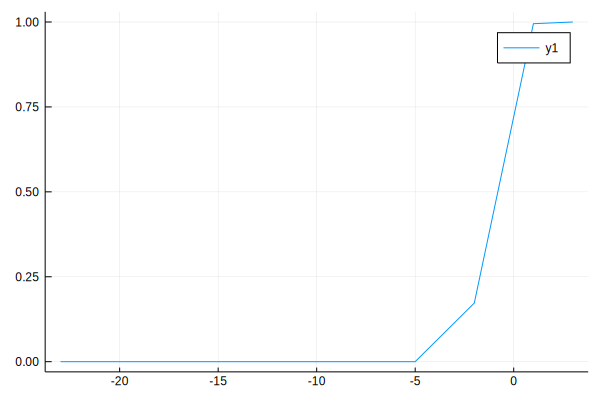

In [638]:
τ = [10.0, 20.0]
ξ = [1.40, 1.15]
m = length(τ)
n = 128
X = zeros(m, n)
W = zeros(m, n)
p = zeros(10,1)
sw = [-23 -20 -17 -14 -11 -8 -5 -2 1 3]
for j in 1:length(sw)
    ξ[2]= sw[j]
    ξ[1]= sw[j]
for i in 1:m
    X[i, :], W[i, :] = gaussLegendre(ξ[i], Inf, n)
end
#A = probability(τ, ξ, 128);
A_11 = Aij(X, W, τ, ξ, 1, 1)
A_12 = Aij(X, W, τ, ξ, 1, 2)
A_21 = Aij(X, W, τ, ξ, 2, 1)
A_22 = Aij(X, W, τ, ξ, 2, 2)
A = [A_11 A_12; A_21 A_22]
#B = Lij(X, W, τ, ξ, 1, 1)
p[j] = det(I-A)#, det(I-B)
end

plot(sw',p)

## Alan Edelman's code from class (normalized)

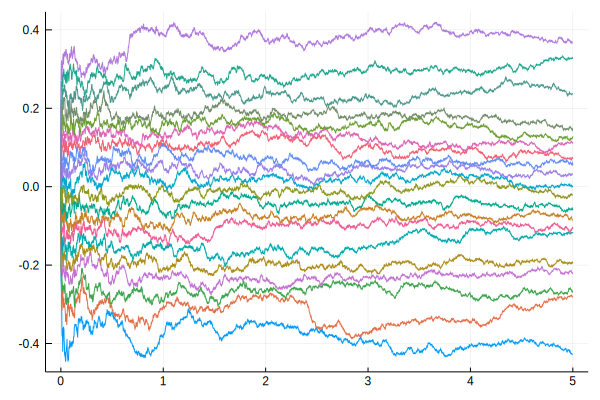

In [68]:
## Dyson
sym(A) = (A + A')/ √2
n = 20 
s = 500 
h = (0:5*s) / s
G = [sym(randn(n,n)) for i in h] #/√s
G[1] *= 0
G = cumsum(G)

e = map(eigvals, G)

plot()
for j = 1:n
    plot!(h,[e[i][j] / √(i*s) for i=1:5*s+1])
end

plot!(legend = false)

## Without Normalization

In [ ]:
## Dyson
sym(A) = (A + A')/ √2
n = 20 
s = 500 
h = (0:5*s) / s
G = [sym(randn(n,n)) for i in h] #/√s
G[1] *= 0
G = cumsum(G)

e = map(eigvals, G)

plot()
for j = 1:n
    plot!(h,[e[i][j] for i=1:5*s+1])
end

plot!(legend = false)

### Bibliography  

1) https://arxiv.org/pdf/math/0403504.pdf

2) https://arxiv.org/pdf/math/0206208.pdf

3) https://arxiv.org/pdf/math/0105240.pdf

4) https://arxiv.org/pdf/0804.2543.pdf 

In [ ]:
G = randn(10, 10) + im * randn(10, 10)
G = (G+G')/√20
eigvals(G)

In [1]:
using Plots, FastGaussQuadrature, SpecialFunctions, LinearAlgebra, IJulia, ForwardDiff

In [11]:
AiryPDF(s)= ForwardDiff.derivative( t->det(I-Aq(t)),s)

AiryPDF (generic function with 1 method)

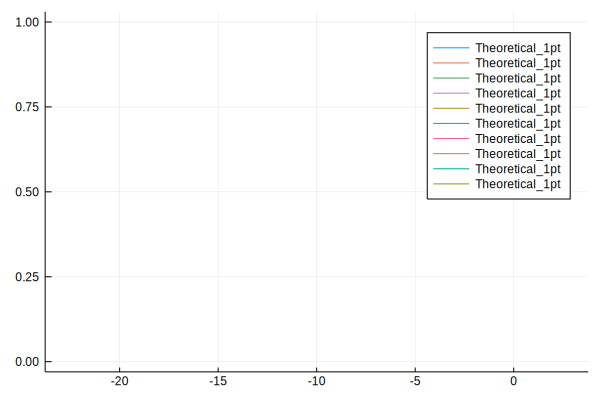

In [646]:
plot(sw,p_1,label = "Theoretical_1pt")
plot(sw,p,label = "Theoretical_2pt")
plot!(sw,p_3,label = "Theoretical_3pt")


#plot!(sw,res, label = "Empirical" )

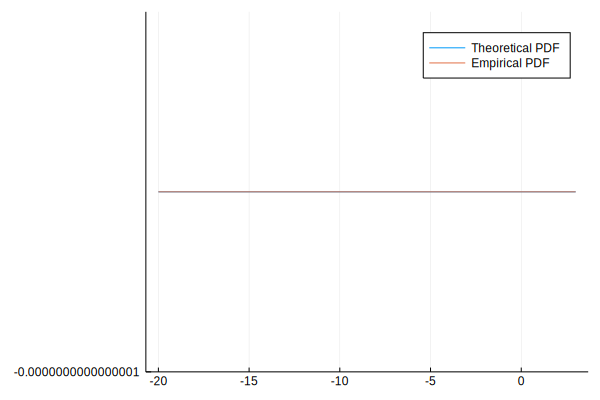

In [639]:
Pr = (p_1[2:length(sw)]-p_1[1:length(sw)-1])/0.5
plot(sw[2:length(sw)],Pr,label = "Theoretical PDF")

Pr_2 = (res[2:length(sw)]-res[1:length(sw)-1])
plot!(sw[2:length(sw)],Pr_2, label = "Empirical PDF")

In [81]:
    τ = [0, 20.0, 40.0]
    ξ = [f*0.1 for f in 1:3]
    m = length(τ)
    n = 128
    X = zeros(m, n)
    W = zeros(m, n)

    #p = zeros(length(sw),1)
    #for j in 1:length(sw)
        ξ[3]= 1
        ξ[2]= 1
        ξ[1]= 1
        for i in 1:m
            X[i, :], W[i, :] = gaussLegendre(ξ[i], Inf, n)
        end

sum(Aij(X, W, τ, ξ, 1, 2)-Lij(X, W, τ, ξ, 1, 2))

0.0

In [106]:
airy_kernel(x, y) = x==y ? (airyaiprime(x))^2 - x * (airyai(x))^2 :
           (airyai(x) * airyaiprime(y) - airyai(y) * airyaiprime(x)) / (x - y)
ϕ(ξ, s) =  s + 10*tan(π*(ξ+1)/4) # Transformation from [-1,1] to (s,∞)
ϕ′(ξ) = (5π/2)*(sec(π*(ξ+1)/4))^2
K(ξ,η,s) = sqrt(ϕ′(ξ) * ϕ′(η)) * airy_kernel(ϕ(ξ,s), ϕ(η,s))

function K(s , n=100) 
    nodes,weights = gausslegendre(n)
    Symmetric( K.(nodes',nodes,s) .* (√).(weights) .* (√).(weights'))
end

TracyWidomPDF_via_Fredholm_Det(s) = ForwardDiff.derivative( t->det(I-K(t)),s)

TracyWidomCDF(s) = det(I-A(s))

TracyWidomCDF (generic function with 1 method)

In [104]:
using Plots, DifferentialEquations, SpecialFunctions, FastGaussQuadrature, LinearAlgebra, ForwardDiff

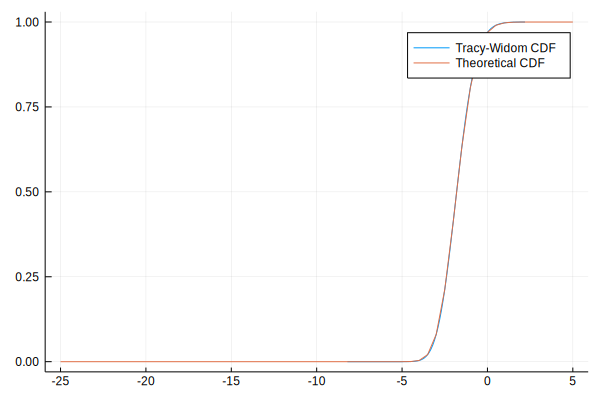

In [354]:
x = [i for i in -8.2:0.1:2.2]
y = zeros(length(x),1)
g = zeros(length(x),1)
p_2 = zeros(length(x),1)
σ = 0.88;
μ = -1.88;
for i in 1:length(x)
    y[i] = TracyWidomCDF(x[i])
    p_2[i] = TracyWidomPDF_via_Fredholm_Det(x[i])
    #g[i] = (1/(σ*√(2*π)))*exp(-0.5*((x[i]-μ)/σ)^2)
end

#plot(x,y,label = "Tracy-Widom CDF",xlabel = "s")#,ylabel = "p(A>s)",yaxis=:log)
#plot(sw[2:length(sw)],p_3,label = "Approximation")
#plot(sw,p3,label = "Approximation", xlabel = "s", ylabel = "p(A>s)")
plot(x,y,label = "Tracy-Widom CDF")
plot!(sw,p,label = "Theoretical CDF")

In [622]:
## 1 pt

function Aq(sw)
    τ = [20]# 40]
    #ξ = [0.3 0.2]# 0.1]
    m = length(τ)
    n = 128
    X = zeros(m, n)
    W = zeros(m, n)

    #p = zeros(length(sw),1)
    #for j in 1:length(sw)
        #ξ[3]= sw
        #ξ[2]= sw
        #ξ[1]= sw
        ξ = sw
        for i in 1:m
            X[i, :], W[i, :] = gausslegendre(n)
        end
        # Construct A with blocks
        A_11 = Aij(X, W, τ, ξ, 1, 1)
        #B = Lij(X, W, τ, ξ, 1, 1)
        #det(I-A_11)#, det(I-B)
    #end   
   return A_11
end

# get theoretical CDF
sw = [b for b in -25:0.5:5]
p_1 = zeros(length(sw),1)
for k in 1:length(sw)
 p_1[k]=det(I-Aq(sw[k]))
end


Aq (generic function with 1 method)

In [622]:
## 2 pt

function Aq(sw)
    τ = [9 20]# 40]
    ξ = [0.3 0.2]# 0.1]
    m = length(τ)
    n = 128
    X = zeros(m, n)
    W = zeros(m, n)

    #p = zeros(length(sw),1)
    #for j in 1:length(sw)
        #ξ[3]= sw
        ξ[2]= sw
        ξ[1]= sw
        #ξ = sw
        for i in 1:m
            X[i, :], W[i, :] = gausslegendre(n)
        end
        # Construct A with blocks
        A_11 = Aij(X, W, τ, ξ, 1, 1)
        A_12 = Aij(X, W, τ, ξ, 1, 2)
        #A_13 = Aij(X, W, τ, ξ, 1, 3)
        A_21 = Aij(X, W, τ, ξ, 2, 1)
        A_22 = Aij(X, W, τ, ξ, 2, 2)
        #A_23 = Aij(X, W, τ, ξ, 2, 3)
        #A_31 = Aij(X, W, τ, ξ, 3, 1)
        #A_32 = Aij(X, W, τ, ξ, 3, 2)
        #A_33 = Aij(X, W, τ, ξ, 3, 3)
        #A = [A_11 A_12 A_13; A_21 A_22 A_23; A_31 A_32 A_33]
        A = [A_11 A_12; A_21 A_22]
        #B = Lij(X, W, τ, ξ, 1, 1)
        #det(I-A_11)#, det(I-B)
    #end   
   return A
end

# get theoretical CDF
sw = [b for b in -25:0.5:5]
p_2 = zeros(length(sw),1)
for k in 1:length(sw)
 p_2[k]=det(I-Aq(sw[k]))
end


Aq (generic function with 1 method)